In [1]:
import data2D as data_import
import os
import matplotlib.pyplot as plt
import numpy as np
from grid import Grid

D = 1e-8
N = 16
Q = 1e-19
M = 1e-27

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(20, 10))


In [2]:
# 3.2 pico seconds for particle to travel L
def exec(dt=0.0001, dt2=0.1, tf=1e12, v=5e3, r=0):

    command = f"java -cp target/SimulacionTemporal-1.0-SNAPSHOT.jar \
                -Ddt={dt} -Ddt2={dt2} -Dtf={tf} \
                -Dv={v} -Dr={r} \
                ElectricFieldSystem"
    proc = os.popen(command)
    print(proc.readlines())
    proc.close()
    data = data_import.Data("ElectricField.txt")
    return data


['Particle escaped!\n']
Initial Energy 1.504632769052528e-65


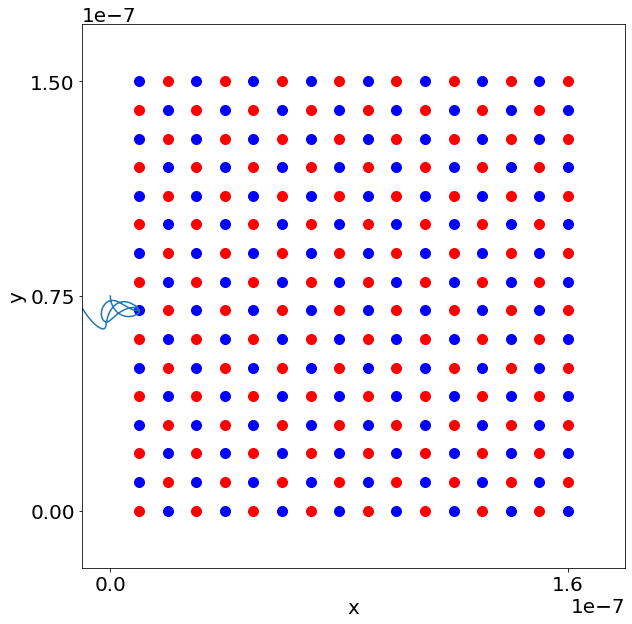

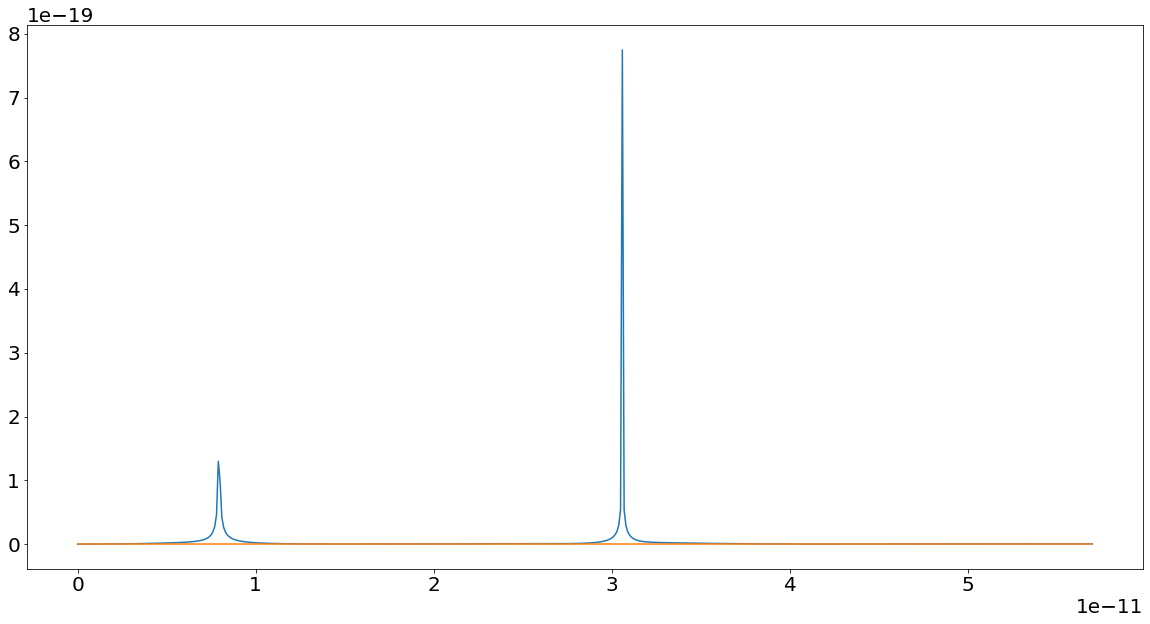

In [7]:
X = []
Y = []
E = []
T = []

grid = Grid(N, D, Q)
V=0
data = exec(r=0, dt=1e-3, dt2=1e-1, v=V)
Ei = grid.calculate_energy(0, (N-1)/2, V, 0, M, Q)
print("Initial Energy", Ei)
for t, x, y, vx, vy in data:
    T.append(t)
    X.append(x)
    Y.append(y)
    E.append(grid.calculate_energy(x,y,vx,vy,M,Q))


plt.figure("Trajectory")
grid.plot()
plt.plot(X, Y, "-", markersize=1)
plt.xticks([0, N*D])
plt.yticks([0,(N-1)*D/2, N*D -D])
plt.ylim(-2*D, N*D + D)
plt.xlim(-D, N*D + 2*D)
plt.gca().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure("Energy")

plt.plot(T, E)
plt.plot(T, [Ei]*len(T))
plt.show()

